In [1]:
## Libraries:

# a) Bond graphs
import BondGraphTools as bgt

# b) Data extraction
import rdflib
from lxml import etree
import pandas
import re
import xml.etree.ElementTree as ET
import os

# c) General
import copy
import difflib
import numpy as np

# Maths
import scipy.integrate

# d) Plot
import matplotlib.pyplot as plt
from matplotlib import markers
import matplotlib.font_manager as font_manager
import matplotlib.colors
from pylab import rcParams

In [2]:
model=bgt.new(name='DC motor')

In [3]:
GY_ratio=1
GY=bgt.new("GY", value=GY_ratio)

TF_ratio= 1
TF=bgt.new("TF", value=TF_ratio)

Se_electric=bgt.new("Se", name='Input Voltage')  


Ia=bgt.new("I", value=0.175, name='Ia')
Ra=bgt.new("R", value=0.875, name='Ra') 

Im=bgt.new("I", value=0.8, name='Im')
Rm=bgt.new("R", value=0.066, name='Rm') 

Il=bgt.new("I", value=0.01, name='I load')
Rl=bgt.new("R", value=0.01, name='R load') 

Rf= bgt.new("R", value=5.495, name='Rf')

C=bgt.new("C", value=10, name='shaft stifness')

one_electric = bgt.new("1")
one_mechanic = bgt.new("1")
zero_Se_electric = bgt.new("0")
zero_C = bgt.new("0")
one_load = bgt.new("1")


bgt.add(model,GY,Se_electric,Ia,Ra,Im,Rm,Rf,one_electric,one_mechanic,zero_Se_electric,C,one_load,TF,Rl,Il,zero_C )


In [4]:
bgt.connect(Se_electric,zero_Se_electric)
bgt.connect(zero_Se_electric,Rf)
bgt.connect(zero_Se_electric,one_electric)
bgt.connect(one_electric,Ra)
bgt.connect(one_electric,Ia)
bgt.connect(one_electric,(GY,0))
bgt.connect((GY,1),one_mechanic)
bgt.connect(one_mechanic,Im)
bgt.connect(one_mechanic,Rm)
bgt.connect(one_mechanic,zero_C)
bgt.connect(zero_C,C)
bgt.connect(zero_C,(TF,0))
bgt.connect((TF,1),one_load)
bgt.connect(one_load,Rl)
bgt.connect(one_load,Il)

In [5]:
model.state_vars

{'x_0': (I: Ia, 'p_0'),
 'x_1': (I: Im, 'p_0'),
 'x_2': (C: shaft stifness, 'q_0'),
 'x_3': (I: I load, 'p_0')}

In [6]:
x0={"x_0":1, "x_1":0, "x_2":0, "x_3":0}

In [7]:
model.control_vars

{'u_0': (SS: 220V, 'e')}

In [8]:
timespan=[0,40]
step_fn = 't < 10 ? 0 : t<25 ? 220 : 0'
t, x = bgt.simulate(model, timespan=timespan, x0=x0, control_vars={'u_0':step_fn},  dt=0.01)


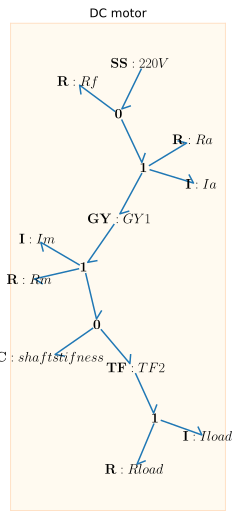

In [10]:
bgt.draw(model)

Text(0.5,0,'Time (ms)')

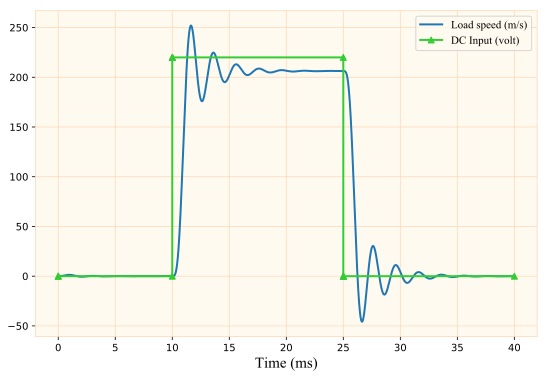

In [9]:
%config InlineBackend.figure_format = 'svg'
rcParams['figure.figsize'] = 9, 6
plt.rcParams['axes.facecolor'] = 'floralwhite'
plt.rc('axes',edgecolor='peachpuff')

font = font_manager.FontProperties(family='Times New Roman',
                                   weight='bold',
                                   style='normal', size=11)


plt.plot(t,-x[:,3]/Il._params['L'], linewidth='2', label='Load speed (m/s)')
a=np.array([0,10,10.01,25,25.01,40])
b=np.array([0,0,220,220,0,0])
plt.step(a,b,'limegreen', marker='^',  linewidth='2', label='DC Input (volt)')

plt.legend(bbox_to_anchor=(1, 1), prop=font )

plt.grid(color='peachpuff')
plt.xlabel('Time (ms)', fontweight='bold',family='Times New Roman', fontsize=15)
